# The very best challenge like no one ever was!

# Notebook di training

In [1]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_path = "./train.csv"
test_path = "./test.csv"
pokemons_path = "./pokemon.csv"

pokemon_data = pd.read_csv(pokemons_path)

### Una preparazione della tabella di lookup
Nel notebook di preparazione abbiamo visto che un Pokémon è definito da 12 attributi.
L'id ci servirà solamente per il lookup. Il nome possiamo intuire già ora che non influisce sugli esiti delle battaglie. Ciò che conta di più sono i tipi e le 6 statistiche. Il numero di generazione non dovrebbe influire sull'esito della battaglia, tutte le generazioni hanno Pokémon forti e Pokémon deboli. Un Pokémon leggendario è solitamente più forte dei Pokémon non leggendari, ma probabilmente riusciremo ad omettere questa feature in quanto la "leggendarietà" è correlata alla somma delle statistiche

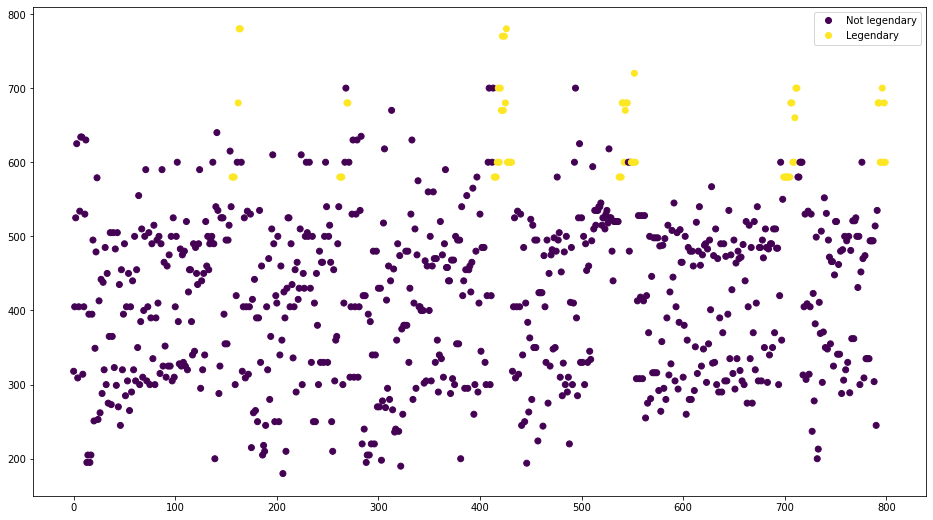

In [4]:
legendary = pd.DataFrame()
legendary["Stats"] = pokemon_data.iloc[:, 4:10].sum(axis=1)
legendary["Legendary"] = pokemon_data["Legendary"]
legendary["Generation"] = pokemon_data["Generation"]
plt.figure(figsize=(16, 9))
scatter = plt.scatter(legendary.index, legendary["Stats"], c=legendary["Legendary"])
plt.legend(handles=scatter.legend_elements()[0], labels=["Not legendary", "Legendary"])
plt.show()

Proprio come ci aspettavamo: i Pokémon leggendari hanno una somma di statistiche superiore

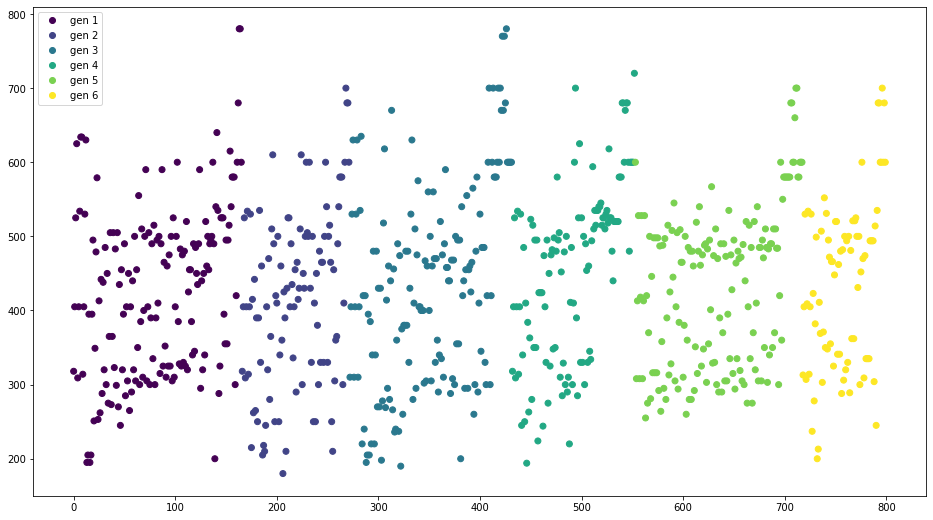

In [5]:
plt.figure(figsize=(16, 9))
scatter = plt.scatter(legendary.index, legendary["Stats"], c=legendary["Generation"])
plt.legend(handles=scatter.legend_elements()[0], labels=["gen {}".format(i) for i in range(1,7)])
plt.show()

Anche qui è come ipotizzavamo: ogni generazione ha Pokémon forti e Pokémon deboli, distribuiti ugualmente per ogni generazione.  
Pertanto la generazione non influisce sull'esito della battaglia

Possiamo quindi estrarre le colonne rilevanti dalla tabella di lookup

In [6]:
features = ["#", "Type 1", "Type 2", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
pokemon_data = pokemon_data[features]

## I Tipi
I tipi dei Pokémon sono features categoriche. In totale sono 18, ognuno ha efficacia o debolezza sugli altri.
Ogni Pokémon può avere al massimo 2 tipi (questo vuol dire che aumentano le combinazioni di debolezza/efficacia, ma noi non siamo qui in veste di programmatori della battaglia ma solo in quanto analisti quindi non ci interessano questi dettagli).  
Il modo migliore di rappresentare un Pokémon è usare valori numerici per le statistiche e una matrice per i tipi. Quindi ora ogni riga della tabella di lookup avrà valore = 1 in un tipo (o in 2 tipi) e 0 in tutti gli altri

In [7]:
pokemon_data["Type 1"] = pokemon_data["Type 1"].astype("str")
pokemon_data["Type 2"] = pokemon_data["Type 2"].astype("str")
types1 = pd.get_dummies(pokemon_data["Type 1"])
types2 = pd.get_dummies(pokemon_data["Type 2"])
types = types1 + types2
types = types.drop(columns=["nan"])
types.head(10)

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Normalizziamo i valori dei tipi

In [8]:
types = types - 0.5

In [9]:
pokemon_data = pokemon_data.drop(columns=["Type 1", "Type 2"])

In [10]:
for col in types.columns:
    pokemon_data[col] = types[col]

In [11]:
pokemon_data

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Bug,Dark,Dragon,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,45,49,49,65,65,45,-0.5,-0.5,-0.5,...,-0.5,0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5
1,2,60,62,63,80,80,60,-0.5,-0.5,-0.5,...,-0.5,0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5
2,3,80,82,83,100,100,80,-0.5,-0.5,-0.5,...,-0.5,0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5
3,4,80,100,123,122,120,80,-0.5,-0.5,-0.5,...,-0.5,0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5
4,5,39,52,43,60,50,65,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,50,100,150,100,150,50,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5
796,797,50,160,110,160,110,110,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5
797,798,80,110,60,150,130,70,-0.5,-0.5,-0.5,...,0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5
798,799,80,160,60,170,130,80,-0.5,0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5


In [12]:
types_names = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water']
stats_names = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

Normalizziamo i valori delle statistiche

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pokemon_data[stats_names] = scaler.fit_transform(pokemon_data[stats_names])
pokemon_data.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Bug,Dark,Dragon,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-0.5,-0.5,-0.5,...,-0.5,0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5
1,2,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-0.5,-0.5,-0.5,...,-0.5,0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5
2,3,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,-0.5,-0.5,-0.5,...,-0.5,0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5
3,4,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,-0.5,-0.5,-0.5,...,-0.5,0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5
4,5,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5


Creiamo la nostra tabella di lookup come prodotto cartesiano della tabella con sè stessa, per avere tutti i possibili accoppiamenti tra Pokémon

In [14]:
first_columns_names = []
second_columns_names = []
first_columns_names = ["{}1".format(row) for row in pokemon_data.columns]
second_columns_names = ["{}2".format(row) for row in pokemon_data.columns]
pokemon_data.columns

Index(['#', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Bug',
       'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying',
       'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic',
       'Rock', 'Steel', 'Water'],
      dtype='object')

In [15]:
train_data = pd.read_csv(train_path)
first_pokemon_data = pd.DataFrame(data=pokemon_data, copy=True)
first_pokemon_data.columns=first_columns_names
second_pokemon_data = pd.DataFrame(data=pokemon_data, copy=True)
second_pokemon_data.columns=second_columns_names

In [16]:
cross_pokemon_data = first_pokemon_data.merge(second_pokemon_data, how="cross")

In [17]:
cross_pokemon_data["id"] = cross_pokemon_data["#1"].astype("str") + "-" + cross_pokemon_data["#2"].astype("str")
cross_pokemon_data

,#1,HP1,Attack1,Defense1,Sp. Atk1,Sp. Def1,Speed1,Bug1,Dark1,Dragon1,...,Grass2,Ground2,Ice2,Normal2,Poison2,Psychic2,Rock2,Steel2,Water2,id
0,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-0.5,-0.5,-0.5,...,0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,1-1
1,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-0.5,-0.5,-0.5,...,0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,1-2
2,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-0.5,-0.5,-0.5,...,0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,1-3
3,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-0.5,-0.5,-0.5,...,0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,1-4
4,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639995,800,0.420917,0.955658,1.481116,1.748526,0.650720,0.059310,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,800-796
639996,800,0.420917,0.955658,1.481116,1.748526,0.650720,0.059310,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,800-797
639997,800,0.420917,0.955658,1.481116,1.748526,0.650720,0.059310,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,800-798
639998,800,0.420917,0.955658,1.481116,1.748526,0.650720,0.059310,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,800-799


Definiamo una funzione che carichi i dati e li prepari per il training

In [18]:
total_features = ['HP1', 'Attack1', 'Defense1', 'Sp. Atk1', 'Sp. Def1', 'Speed1',
       'Bug1', 'Dark1', 'Dragon1', 'Electric1', 'Fairy1', 'Fighting1', 'Fire1',
       'Flying1', 'Ghost1', 'Grass1', 'Ground1', 'Ice1', 'Normal1', 'Poison1',
       'Psychic1', 'Rock1', 'Steel1', 'Water1', 'HP2', 'Attack2',
       'Defense2', 'Sp. Atk2', 'Sp. Def2', 'Speed2', 'Bug2', 'Dark2',
       'Dragon2', 'Electric2', 'Fairy2', 'Fighting2', 'Fire2', 'Flying2',
       'Ghost2', 'Grass2', 'Ground2', 'Ice2', 'Normal2', 'Poison2', 'Psychic2',
       'Rock2', 'Steel2', 'Water2']

def load_data(path):
    data = pd.read_csv(path)
    #ci serve un target OneHot di lunghezza 2 (es. [0, 1] se è il secondo Pokémon a vincere)
    data["isFirst"] = data["Winner"] == data["Second_pokemon"]
    data["id"] = data["First_pokemon"].astype("str") + "-" + data["Second_pokemon"].astype("str")
    data= data.drop(columns=["First_pokemon", "Second_pokemon"]).merge(cross_pokemon_data, on="id")
    X = data[total_features].values
    y = pd.get_dummies(data["isFirst"]).values
    print("X shape: ", X.shape, "\n", "y shape: ", y.shape)
    return X, y

## Training time!

Ora che abbiamo i dati preprocessati possiamo addestrare la rete (non i Pokémon ahimé). Modelliamo una rete neurale utilizzando Keras

In [19]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [20]:
X_train, y_train = load_data(train_path) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=10, stratify=y_train)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

X shape:  (34000, 48) 
 y shape:  (34000, 2)
(25500, 48) (8500, 48) (25500, 2) (8500, 2)


La nostra rete avrà queste caratteristiche:
- 4 strati : 1 input, 2 nascosti, 1 output
- funzioni di attivazione: ReLU per i primi 3 strati e sigmoid per l'ultimo. Secondo quanto visto a lezione, la ReLu è la migliore. Nell'ultimo strato usiamo la sigmoide per avere un output compreso in un intervallo 0-1, che va bene in coppia con una loss come l' entropia incrociata
- loss: Binary Cross-Entropy, studiata ne corso di ML. è tra le loss probabilistiche migliori. Può essere anche espressa come divergenza di Kullback-Leibler accennata in questo corso. Nel nostro caso è buona visto che abbiamo output e valori reali compresi tra 0-1
- ottimizzatore: Adam, anche in questa scelta seguiamo i consigli delle lezioni. Adam è il miglior ottimizzatore in circolazione, unisce le caratteristiche di SGD Momentum e RMS Prop
- metrica: accuracy, ovvero la percentuale di predizioni corrette

Facciamo prima una prova usando parte del training set come validation set e vediamo le prestazioni

In [21]:
in_dim = 48*2
hide_dim_1 = in_dim*3/2
hide_dim_2 = hide_dim_1*2/3
out_dim = 2


model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(in_dim, input_dim=48, activation="relu"),
  tf.keras.layers.Dense(hide_dim_1 ,activation="relu"),
  tf.keras.layers.Dense(hide_dim_2 ,activation="relu"),
  tf.keras.layers.Dense(out_dim, activation="sigmoid")
])

model.compile(
    optimizer="Adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    # utilizziamo il validation set
    validation_data=(X_val, y_val)
)

Epoch 1/100
399/399 [==============================] - 2s 3ms/step - loss: 0.3097 - accuracy: 0.8889 - val_loss: 0.2079 - val_accuracy: 0.9276
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 0.1998 - accuracy: 0.9282 - val_loss: 0.1800 - val_accuracy: 0.9388
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.1724 - accuracy: 0.9351 - val_loss: 0.1650 - val_accuracy: 0.9401
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.1592 - accuracy: 0.9397 - val_loss: 0.1536 - val_accuracy: 0.9427
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.1481 - accuracy: 0.9433 - val_loss: 0.1495 - val_accuracy: 0.9413
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.1343 - accuracy: 0.9500 - val_loss: 0.1406 - val_accuracy: 0.9455
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.1262 - accuracy: 0.9518 - val_loss: 0.1488 - val_accuracy: 0.9415

Epoch 58/100
399/399 [==============================] - 1s 2ms/step - loss: 0.0195 - accuracy: 0.9927 - val_loss: 0.2630 - val_accuracy: 0.9536
Epoch 59/100
399/399 [==============================] - 1s 2ms/step - loss: 0.0178 - accuracy: 0.9932 - val_loss: 0.2626 - val_accuracy: 0.9488
Epoch 60/100
399/399 [==============================] - 1s 3ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.2989 - val_accuracy: 0.9519
Epoch 61/100
399/399 [==============================] - 1s 3ms/step - loss: 0.0228 - accuracy: 0.9920 - val_loss: 0.2972 - val_accuracy: 0.9429
Epoch 62/100
399/399 [==============================] - 1s 3ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.2776 - val_accuracy: 0.9514
Epoch 63/100
399/399 [==============================] - 1s 3ms/step - loss: 0.0201 - accuracy: 0.9930 - val_loss: 0.2854 - val_accuracy: 0.9428
Epoch 64/100
399/399 [==============================] - 1s 3ms/step - loss: 0.0129 - accuracy: 0.9953 - val_loss: 0.2716 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


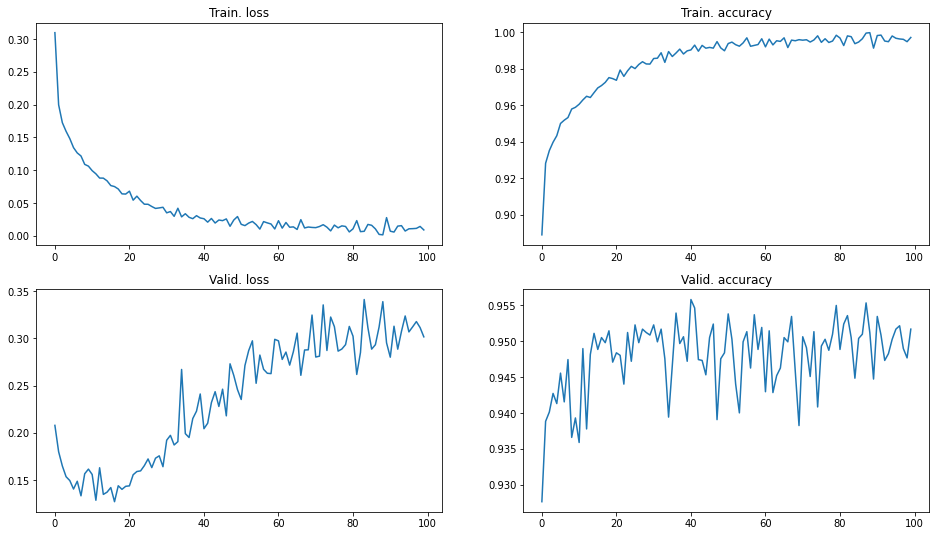

In [22]:
print(history.history.keys())
fig, axs = plt.subplots(2, 2, figsize=(16,9))
axs[0,0].plot(history.history["loss"])
axs[0,0].set_title("Train. loss")
axs[0,1].plot(history.history["accuracy"])
axs[0,1].set_title("Train. accuracy")
axs[1,0].plot(history.history["val_loss"])
axs[1,0].set_title("Valid. loss")
axs[1,1].plot(history.history["val_accuracy"])
axs[1,1].set_title("Valid. accuracy")
plt.show()

Ora addestriamo la rete con tutto il training set

In [23]:
X_train, y_train = load_data(train_path)

in_dim = 48*2
hide_dim_1 = in_dim*3/2
hide_dim_2 = hide_dim_1*2/3
out_dim = 2


model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(in_dim, input_dim=48, activation="relu"),
  tf.keras.layers.Dense(hide_dim_1 ,activation="relu"),
  tf.keras.layers.Dense(hide_dim_2 ,activation="relu"),
  tf.keras.layers.Dense(out_dim, activation="sigmoid")
])

model.compile(
    optimizer="Adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=150
)

X shape:  (34000, 48) 
 y shape:  (34000, 2)
Epoch 1/150
532/532 [==============================] - 2s 2ms/step - loss: 0.2858 - accuracy: 0.8964
Epoch 2/150
532/532 [==============================] - 1s 2ms/step - loss: 0.1810 - accuracy: 0.9345
Epoch 3/150
532/532 [==============================] - 1s 2ms/step - loss: 0.1601 - accuracy: 0.9409
Epoch 4/150
532/532 [==============================] - 1s 2ms/step - loss: 0.1509 - accuracy: 0.9412
Epoch 5/150
532/532 [==============================] - 1s 2ms/step - loss: 0.1417 - accuracy: 0.9454
Epoch 6/150
532/532 [==============================] - 1s 2ms/step - loss: 0.1325 - accuracy: 0.9497
Epoch 7/150
532/532 [==============================] - 1s 2ms/step - loss: 0.1255 - accuracy: 0.9511
Epoch 8/150
532/532 [==============================] - 1s 2ms/step - loss: 0.1182 - accuracy: 0.9539
Epoch 9/150
532/532 [==============================] - 1s 2ms/step - loss: 0.1123 - accuracy: 0.9559
Epoch 10/150
532/532 [========================

Epoch 81/150
532/532 [==============================] - 1s 2ms/step - loss: 0.0144 - accuracy: 0.9951
Epoch 82/150
532/532 [==============================] - 1s 2ms/step - loss: 0.0126 - accuracy: 0.9953
Epoch 83/150
532/532 [==============================] - 1s 2ms/step - loss: 0.0099 - accuracy: 0.9962
Epoch 84/150
532/532 [==============================] - 1s 2ms/step - loss: 0.0150 - accuracy: 0.9949
Epoch 85/150
532/532 [==============================] - 1s 3ms/step - loss: 0.0108 - accuracy: 0.9963
Epoch 86/150
532/532 [==============================] - 1s 2ms/step - loss: 0.0126 - accuracy: 0.9959
Epoch 87/150
532/532 [==============================] - 1s 3ms/step - loss: 0.0188 - accuracy: 0.9944
Epoch 88/150
532/532 [==============================] - 1s 3ms/step - loss: 0.0110 - accuracy: 0.9964
Epoch 89/150
532/532 [==============================] - 1s 2ms/step - loss: 0.0069 - accuracy: 0.9976
Epoch 90/150
532/532 [==============================] - 1s 3ms/step - loss: 0.0117

Text(0.5, 1.0, 'Train. accuracy')

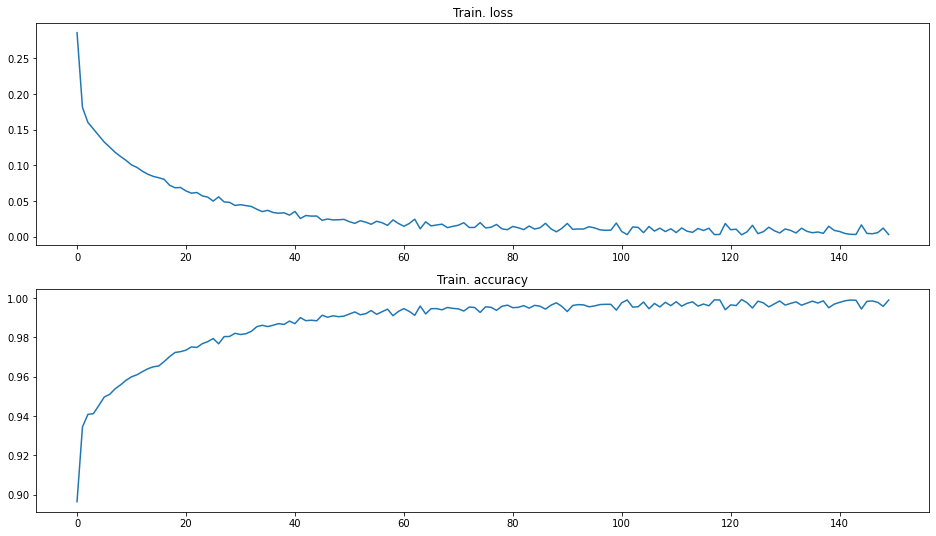

In [24]:
fig, axs = plt.subplots(2, figsize=(16,9))
axs[0].plot(history.history["loss"])
axs[0].set_title("Train. loss")
axs[1].plot(history.history["accuracy"])
axs[1].set_title("Train. accuracy")

In [25]:
X_test, y_test = load_data(test_path)
model.evaluate(X_test, y_test)

X shape:  (6000, 48) 
 y shape:  (6000, 2)
188/188 [==============================] - 0s 1ms/step - loss: 0.3201 - accuracy: 0.9557


[0.3200913965702057, 0.9556666612625122]

## Prova con dati "inventati"
Proviamo a predire l'esito di una battaglia scegliendo noi i Pokémon che combatteranno

In [26]:
pokemons = pd.read_csv(pokemons_path)
def get_pokemon_match(name_first, name_second):
    id_first = pokemons.loc[pokemons.Name == name_first].iloc[0]["#"]
    id_second = pokemons.loc[pokemons.Name == name_second].iloc[0]["#"]
    new_id = str(id_first) + "-" + str(id_second)
    match = cross_pokemon_data.loc[cross_pokemon_data.id == new_id]
    match = match[total_features].values
    return match

def get_winner(name_first, name_second):
    match = get_pokemon_match(name_first, name_second)
    winner = model.predict(match)
    trust = float(np.absolute(np.diff(winner)))
    winner_idx = np.argmax(winner)
    if winner_idx == 0:
        winner_name = name_first
    else:
        winner_name = name_second
    return winner_name, trust

Match scontato: Mewtwo vs Pidgey. Ci aspettiamo che Mewtwo, il _Pokémon più potente_ vinca contro un piccolo uccellino del Percorso 1

In [27]:
get_winner("Pidgey", "Mewtwo")

('Mewtwo', 1.0)

Match tra due leggendari, Groudon e Rayquaza. Qui l'esito non è così scontato

In [28]:
get_winner("Groudon", "Rayquaza")

('Rayquaza', 0.9999980926513672)

Ci sta che Rayquaza vinca, in quanto è il capo del trio con Groudon, Kyogre

Bene, adesso possiamo utilizzare questo strumento e andare a divertirci su Pokemon Showdown!